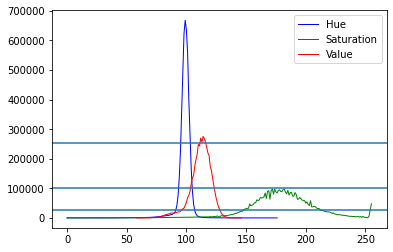

In [20]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
from IPython.display import Image

img = cv.imread('res/cached_image.png')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

pixels = np.array(img_hsv.reshape(-1, 3))
v, vc = np.unique(pixels[:, 2], axis=0, return_counts=True)
s, sc = np.unique(pixels[:, 1], axis=0, return_counts=True)
h, hc = np.unique(pixels[:, 0], axis=0, return_counts=True)
plt.plot(h, hc, 'b', label='Hue', linewidth=1)
plt.plot(s, sc, 'g', label='Saturation', linewidth=1)
plt.plot(v, vc, 'r', label='Value', linewidth=1)
plt.axhline(y=5/100*len(pixels))
plt.axhline(y=2/100*len(pixels))
plt.axhline(y=0.5/100*len(pixels))
plt.legend()
plt.plot()

Image(url="https://docs.opencv.org/4.x/Threshold_inRange_HSV_colorspace.jpg")

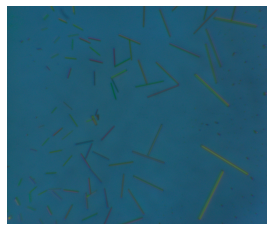

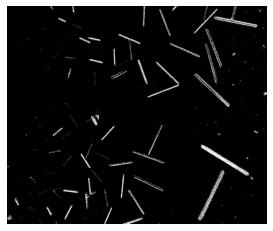

In [38]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('res/cached_image.png')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_temp = img.copy()

pixels = np.array(img_temp.reshape(-1, 3))
v, vc = np.unique(pixels[:, 2], axis=0, return_counts=True)
s, sc = np.unique(pixels[:, 1], axis=0, return_counts=True)
h, hc = np.unique(pixels[:, 0], axis=0, return_counts=True)

ac_h = 0.001
ac_s = 0
ac_v = 0
new_h = []
amount = ac_h/100 * len(pixels)
for i in range(len(h)):
    if hc[i] > amount:
        new_h.append(h[i])
new_s = []
amount = ac_s/100 * len(pixels)
for i in range(len(s)):
    if sc[i] > amount:
        new_s.append(s[i])
new_v = []
amount = ac_v/100 * len(pixels)
for i in range(len(v)):
    if vc[i] > amount:
        new_v.append(v[i])
thresh = cv.inRange(img_hsv, (int(min(h)), int(min(s)), int(min(v))), (int(max(h)), int(max(s)), int(max(v))))

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
plt.imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

